In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install kaggle
! pip install kaggle
! mkdir ~/.kaggle
! echo '{"username":"elienader","key":"ae8735196ab8bee32da2e17efcbdf48d"}' > ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c mais202fall2021
!unzip test_images.npy.zip && rm test_images.npy.zip
!unzip train_images.npy.zip && rm train_images.npy.zip

  0% 0.00/429k [00:00<?, ?B/s]
100% 429k/429k [00:00<00:00, 61.8MB/s]
  0% 0.00/127 [00:00<?, ?B/s]
100% 127/127 [00:00<00:00, 108kB/s]
 24% 5.00M/20.7M [00:00<00:02, 5.77MB/s]
100% 20.7M/20.7M [00:00<00:00, 22.4MB/s]
  0% 0.00/165k [00:00<?, ?B/s]
100% 165k/165k [00:00<00:00, 125MB/s]
 79% 41.0M/51.7M [00:01<00:00, 22.3MB/s]
100% 51.7M/51.7M [00:01<00:00, 41.2MB/s]
Archive:  test_images.npy.zip
  inflating: test_images.npy         
Archive:  train_images.npy.zip
  inflating: train_images.npy        


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.python import keras
from tensorflow.math import argmax
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

In [ ]:
train_images = np.load("train_images.npy")
train_labels = pd.read_csv("train_labels.csv",usecols=[1]) # only read the 2nd column
test_images = np.load("test_images.npy")

# convert the csv file for str labels to a dict for ease of use
# this will help display image samples if needed with the help of the
# show_image() function
str_labels = dict()
f = open("label_int_to_str_mapping.csv")
count = 0
for line in f:
    if count == 0: # skip the header of the csv
      count += 1
      continue
    line = line.strip('\n')
    (key, val) = line.split(",")
    str_labels[int(key)] = val
print(str_labels)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [ ]:
def data_preprocessing(raw):
    num_images = raw.shape[0]
    x_shaped_array = raw.reshape(num_images, 28, 28, 1) # needed for the model
    return x_shaped_array
train_images = data_preprocessing(train_images)
test_images = data_preprocessing(test_images)
train_labels = to_categorical(train_labels, 10)
print(train_labels.shape)
print(train_images.shape, test_images.shape)

(50000, 10)
(50000, 28, 28, 1) (20000, 28, 28, 1)


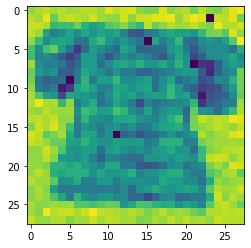

(28, 28, 1)


In [ ]:
def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

show_image(train_images[0]) # 0 is the index of the training image you want to display
print(train_images[0].shape)

In [ ]:
# Parameters
NB_EPOCHS = 75
BATCH_SIZE = 128

# Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
train_model = model.fit(train_images, train_labels,
                  batch_size=BATCH_SIZE,
                  epochs=NB_EPOCHS,
                  verbose=1)

Epoch 1/50
391/391 - 45s - loss: 4.4755 - accuracy: 0.1024
Epoch 2/50
391/391 - 44s - loss: 2.2312 - accuracy: 0.1474
Epoch 3/50
391/391 - 44s - loss: 1.8080 - accuracy: 0.3103
Epoch 4/50
391/391 - 44s - loss: 1.4375 - accuracy: 0.4523
Epoch 5/50
391/391 - 44s - loss: 1.2065 - accuracy: 0.5392
Epoch 6/50
391/391 - 44s - loss: 1.0599 - accuracy: 0.5919
Epoch 7/50
391/391 - 44s - loss: 0.9365 - accuracy: 0.6424
Epoch 8/50
391/391 - 44s - loss: 0.8527 - accuracy: 0.6744
Epoch 9/50
391/391 - 44s - loss: 0.7868 - accuracy: 0.7014
Epoch 10/50
391/391 - 44s - loss: 0.7464 - accuracy: 0.7197
Epoch 11/50
391/391 - 44s - loss: 0.7119 - accuracy: 0.7309
Epoch 12/50
391/391 - 44s - loss: 0.6923 - accuracy: 0.7388
Epoch 13/50
391/391 - 44s - loss: 0.6712 - accuracy: 0.7468
Epoch 14/50
391/391 - 43s - loss: 0.6520 - accuracy: 0.7529
Epoch 15/50
391/391 - 44s - loss: 0.6329 - accuracy: 0.7635
Epoch 16/50
391/391 - 44s - loss: 0.6181 - accuracy: 0.7702
Epoch 17/50
391/391 - 44s - loss: 0.6111 - accura

In [ ]:
path_to_save = "/content/drive/My Drive/MAIS Assignment 4"
model.save(path_to_save)

INFO:tensorflow:Assets written to: /content/drive/My Drive/MAIS Assignment 4/assets


In [ ]:
model = keras.models.load_model("/content/drive/My Drive/MAIS Assignment 4")

In [ ]:
test_label = model.predict(test_images)

test_label = argmax(test_label, axis=1) # convert back from categorical

# get the test labels in csv file
df_test = pd.read_csv('sample_submission.csv')
df_test['label'] = test_label
df_test.to_csv('submission.csv', index=False)

[[3.4837621e-19 6.4464693e-22 1.9336706e-21 ... 1.9086020e-04
  5.1479897e-15 9.9980861e-01]
 [1.6752900e-07 4.4689500e-08 9.5387065e-10 ... 6.5954024e-04
  2.2521454e-06 6.2345038e-03]
 [8.0664661e-03 1.4558442e-04 6.4854312e-01 ... 4.0188075e-09
  8.9923507e-03 4.8099378e-09]
 ...
 [6.4860156e-04 9.3846029e-04 5.6473901e-03 ... 6.5283928e-12
  9.2405880e-06 3.8930245e-10]
 [1.4034176e-02 3.8066620e-04 6.3680806e-03 ... 7.9367728e-06
  9.5308930e-01 2.6319763e-05]
 [1.7113509e-04 6.3307759e-08 3.8680334e-02 ... 2.2132899e-18
  1.8307775e-05 7.4732201e-19]]
tf.Tensor([9 5 2 ... 3 8 6], shape=(20000,), dtype=int64)
